In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("C:/Users/dell/Documents/datasets\AAPL.csv")

In [61]:
df.shape

(2596, 7)

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837122,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624596,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161518,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066452,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109690,458707200


In [63]:
df=df[['Date','Close']]

In [64]:
#change the date column to datetime
import datetime
def str_to_datetime(s):
    split=s.split('-')
    year, month, day=int(split[0]),int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)



In [65]:
df['Date']=df['Date'].apply(str_to_datetime)

In [66]:
df['Date']

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-07
4      2013-01-08
          ...    
2591   2023-04-19
2592   2023-04-20
2593   2023-04-21
2594   2023-04-24
2595   2023-04-25
Name: Date, Length: 2596, dtype: datetime64[ns]

In [67]:
df.index=df.pop('Date')

In [68]:
df

,Close
Date,
2013-01-02,19.608213
2013-01-03,19.360714
2013-01-04,18.821428
2013-01-07,18.710714
2013-01-08,18.761070
...,...
2023-04-19,167.630005
2023-04-20,166.649994
2023-04-21,165.020004


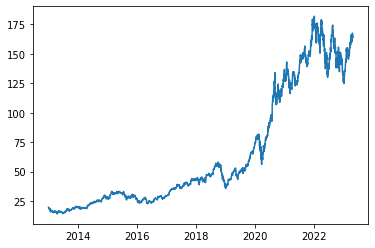

In [69]:
plt.plot(df.index, df['Close'])

In [70]:
def data_to_df(dataframe, first_date_str, last_date_str, n=3):
    first_date=str_to_datetime(first_date_str)
    last_date=str_to_datetime(last_date_str)
    
    target_date=first_date
    
    dates=[]
    X, Y=[],[]
    
    last_time=False
    while True:
        df_subset=dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n +1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values=df_subset['Close'].to_numpy()
        x,y=values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week=dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str=str(next_week.head(2).tail(1).index.values[0])
        next_date_str=next_datetime_str.split('T')[0]
        year_month_day=next_date_str.split('-')
        year, month, day=year_month_day
        next_date=datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date=next_date
        
        if target_date==last_date:
            last_time=True
        
    ret_df=pd.DataFrame({})
    ret_df['Target Date']=dates
        
    X=np.array(X)
    for i in range(0,n):
        X[:,i]
        ret_df[f'Target-{n-i}'] = X[:,i]
            
    ret_df['Target']=Y
        
    return ret_df
    
windowed_df=data_to_df(df,'2019-01-07','2023-01-25',n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2019-01-07,39.480000,35.547501,37.064999,36.982498
1,2019-01-08,35.547501,37.064999,36.982498,37.687500
2,2019-01-09,37.064999,36.982498,37.687500,38.327499
3,2019-01-10,36.982498,37.687500,38.327499,38.450001
4,2019-01-11,37.687500,38.327499,38.450001,38.072498
...,...,...,...,...,...
1016,2023-01-19,134.759995,135.940002,135.210007,135.270004
1017,2023-01-20,135.940002,135.210007,135.270004,137.869995
1018,2023-01-23,135.210007,135.270004,137.869995,141.110001
1019,2023-01-24,135.270004,137.869995,141.110001,142.529999


In [71]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np=windowed_dataframe.to_numpy()
    
    dates=df_as_np[:,0] # to get the dates column
    
    middle_matrix=df_as_np[:, 1:-1] #get all the columns except the dates and target columns
    X=middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y=df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y  =windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1021,), (1021, 3, 1), (1021,))

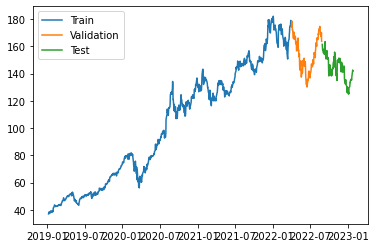

In [82]:
y_80=int(len(dates) * 0.8)
y_90=int(len(dates) * 0.9)

dates_train, x_train, y_train=dates[:y_80], X[:y_80], y[:y_80]

dates_val, x_val, y_val=dates[y_80:y_90],X[y_80:y_90],y[y_80:y_90]

dates_test, x_test, y_test=dates[y_90:], X[y_90:], y[y_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation','Test'])

In [83]:
#building a model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model=Sequential()
model.add(layers.Input((3,1)))
model.add(layers.LSTM(64))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
26/26 [==============================] - 3s 25ms/step - loss: 11801.1260 - mean_absolute_error: 99.9304 - val_loss: 22908.8379 - val_mean_absolute_error: 150.8292
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 10666.6094 - mean_absolute_error: 93.7542 - val_loss: 19692.6387 - val_mean_absolute_error: 139.7531
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 6965.2690 - mean_absolute_error: 69.6999 - val_loss: 9748.3955 - val_mean_absolute_error: 97.8173
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 2297.4231 - mean_absolute_error: 41.1977 - val_loss: 2328.0496 - val_mean_absolute_error: 46.5831
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 1519.6820 - mean_absolute_error: 35.0213 - val_loss: 2228.4797 - val_mean_absolute_error: 45.7265
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 408.3436 - mean_absolute_error: 14.0046 - val_loss: 346.0424 - va

26/26 [==============================] - 0s 5ms/step - loss: 5.7614 - mean_absolute_error: 1.7685 - val_loss: 11.9247 - val_mean_absolute_error: 2.6974
Epoch 51/200
26/26 [==============================] - 0s 5ms/step - loss: 6.0211 - mean_absolute_error: 1.8279 - val_loss: 13.9628 - val_mean_absolute_error: 2.9565
Epoch 52/200
26/26 [==============================] - 0s 5ms/step - loss: 4.9386 - mean_absolute_error: 1.5717 - val_loss: 20.8573 - val_mean_absolute_error: 3.9410
Epoch 53/200
26/26 [==============================] - 0s 5ms/step - loss: 6.1530 - mean_absolute_error: 1.8340 - val_loss: 13.0583 - val_mean_absolute_error: 2.8901
Epoch 54/200
26/26 [==============================] - 0s 5ms/step - loss: 5.6175 - mean_absolute_error: 1.6793 - val_loss: 11.9731 - val_mean_absolute_error: 2.7071
Epoch 55/200
26/26 [==============================] - 0s 5ms/step - loss: 4.9994 - mean_absolute_error: 1.6119 - val_loss: 12.0293 - val_mean_absolute_error: 2.7293
Epoch 56/200
26/26 [===

Epoch 100/200
26/26 [==============================] - 0s 5ms/step - loss: 5.2531 - mean_absolute_error: 1.6373 - val_loss: 16.9514 - val_mean_absolute_error: 3.4073
Epoch 101/200
26/26 [==============================] - 0s 5ms/step - loss: 5.9008 - mean_absolute_error: 1.7691 - val_loss: 24.5309 - val_mean_absolute_error: 4.2512
Epoch 102/200
26/26 [==============================] - 0s 5ms/step - loss: 5.0639 - mean_absolute_error: 1.5900 - val_loss: 13.1092 - val_mean_absolute_error: 2.7969
Epoch 103/200
26/26 [==============================] - 0s 5ms/step - loss: 5.0201 - mean_absolute_error: 1.6129 - val_loss: 14.6142 - val_mean_absolute_error: 3.0806
Epoch 104/200
26/26 [==============================] - 0s 5ms/step - loss: 4.9084 - mean_absolute_error: 1.5847 - val_loss: 12.1521 - val_mean_absolute_error: 2.7705
Epoch 105/200
26/26 [==============================] - 0s 5ms/step - loss: 5.5075 - mean_absolute_error: 1.7326 - val_loss: 13.6438 - val_mean_absolute_error: 2.9197
Epoc

26/26 [==============================] - 0s 5ms/step - loss: 4.8012 - mean_absolute_error: 1.5429 - val_loss: 15.4538 - val_mean_absolute_error: 3.0194
Epoch 150/200
26/26 [==============================] - 0s 5ms/step - loss: 4.9852 - mean_absolute_error: 1.5671 - val_loss: 13.3150 - val_mean_absolute_error: 2.8931
Epoch 151/200
26/26 [==============================] - 0s 5ms/step - loss: 5.3817 - mean_absolute_error: 1.6381 - val_loss: 15.4405 - val_mean_absolute_error: 3.0449
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 6.5020 - mean_absolute_error: 1.8677 - val_loss: 14.0967 - val_mean_absolute_error: 2.8660
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 5.1109 - mean_absolute_error: 1.6205 - val_loss: 12.8284 - val_mean_absolute_error: 2.8228
Epoch 154/200
26/26 [==============================] - 0s 5ms/step - loss: 4.8882 - mean_absolute_error: 1.5768 - val_loss: 12.0059 - val_mean_absolute_error: 2.7284
Epoch 155/200
26/2

26/26 [==============================] - 0s 5ms/step - loss: 5.6071 - mean_absolute_error: 1.7183 - val_loss: 12.4231 - val_mean_absolute_error: 2.7353
Epoch 199/200
26/26 [==============================] - 0s 5ms/step - loss: 4.6857 - mean_absolute_error: 1.5230 - val_loss: 12.3029 - val_mean_absolute_error: 2.7171
Epoch 200/200
26/26 [==============================] - 0s 5ms/step - loss: 5.1564 - mean_absolute_error: 1.6431 - val_loss: 13.1080 - val_mean_absolute_error: 2.7567


26/26 [==============================] - 0s 2ms/step


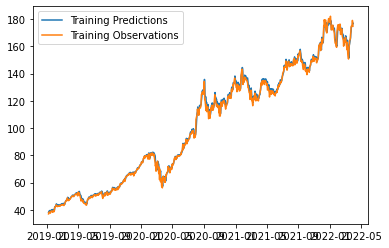

In [84]:
train_predictions=model.predict(x_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.legend(['Training Predictions', 'Training Observations'])
#the trainign observations is actualy what happened, recorded in the data set
#the training predictions is the predictions made by the model 

4/4 [==============================] - 0s 3ms/step


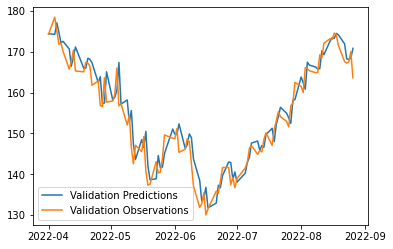

In [85]:
validation_predictions=model.predict(x_val).flatten()
plt.plot(dates_val, validation_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


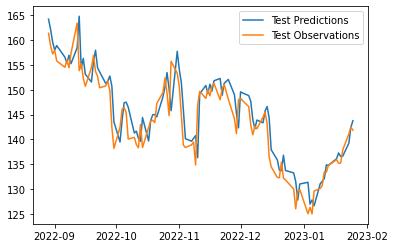

In [86]:
test_predictions=model.predict(x_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

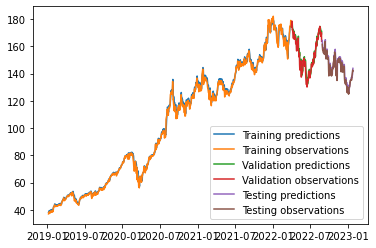

In [87]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training predictions', 'Training observations','Validation predictions','Validation observations','Testing predictions','Testing observations'])